# Introduction

Lights, camera, action! From classic cinema to the modern era of streaming platforms, the film industry has undergone a drastic transformation, adapting to the shifting landscape of entertainment. As someone who often relies on Netflix for film choices, I became curious about the potential impact of streaming on traditional cinema. In order to gain insights into the film industry througout time, I decided to conduct a data analysis project using a dataset sourced from IMDb and retrieved from Kaggle.

## The Data

The dataset used for this analysis contains information on 6820 movies released between 1986 and 2016. This information was scraped from IMDb and is under the title "Movie Industry" on Kaggle. It includes various attributes such as movie ratings, genres, budgets, gross revenue, and more. 

## Objective
By exploring this dataset, we can uncover trends, correlations, and patterns that shed light on the relationship between different factors and the financial performance of films. The project can help us understand the factors that contribute to a film's success in terms of revenue. 


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

#adjusting size of our plots
matplotlib.rcParams['figure.figsize'] = (12,8) 

#locating data
df = pd.read_csv(".../movies.csv")



In [2]:
#What does our data look like?

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning

In [3]:
#checking for missing data by calculating the percentage of missing values in each column of the DataFrame

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.5f}%'.format(col, pct_missing))
    

name - 0.00000%
rating - 0.01004%
genre - 0.00000%
year - 0.00000%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.00000%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28312%
gross - 0.02465%
company - 0.00222%
runtime - 0.00052%


In [4]:
#what type of data are we working with?
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#changing data type of columns

df.dropna(subset=['budget'], inplace=True)
df.dropna(subset=['gross'], inplace=True)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')



One setback from the dataset is that the year in the 'released' date does not always match the 'year' column. In order to fix this discrepancy, the year in the 'released' date was used. 

We use the str.extract() method to extract the four-digit year pattern from each string in the 'released' column. This is so we can create a new DataFrame with the extracted year values.

Then we use "astype(int)" to convert the extracted year values to integers and make a new 'real year' column to add to  the DataFrame.



In [59]:
#correcting Year column
df['real year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df.drop('year', axis=1, inplace=True)


## What is the relationship between a movie's budget and its gross revenue ?

Before comparing the data, it seems that a higher budget allocated to a movie production may lead to higher gross revenue since films with larger budgets are able to invest more in production quality, marketing, and specific actors, ultimately attracting larger audiences and generating higher revenue. 

Now, what does the data say?

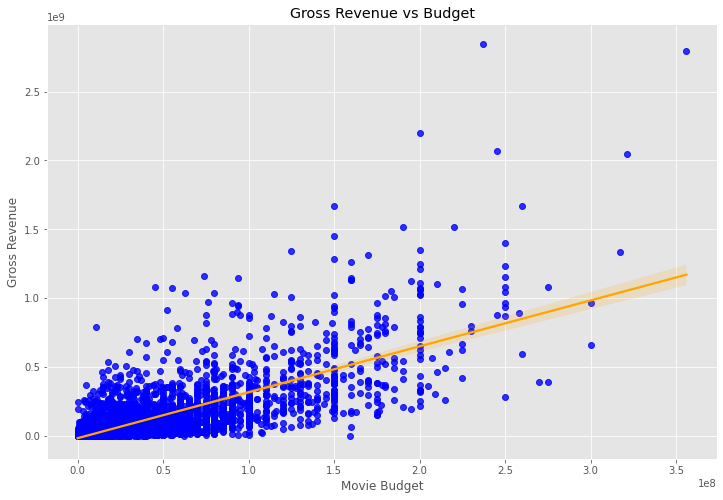

In [60]:
#Plotting Budget Gross Revenue vs. Budget using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "orange"})
plt.xlabel('Movie Budget')  
plt.ylabel('Gross Revenue')  
plt.title('Gross Revenue vs Budget') 
plt.show()

We sort the values in the 'gross' column in descending order to be able to look at the highest gross revenues to verify that the plot matches the values we have. 

In [61]:
dataf = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [62]:
dataf.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,real year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


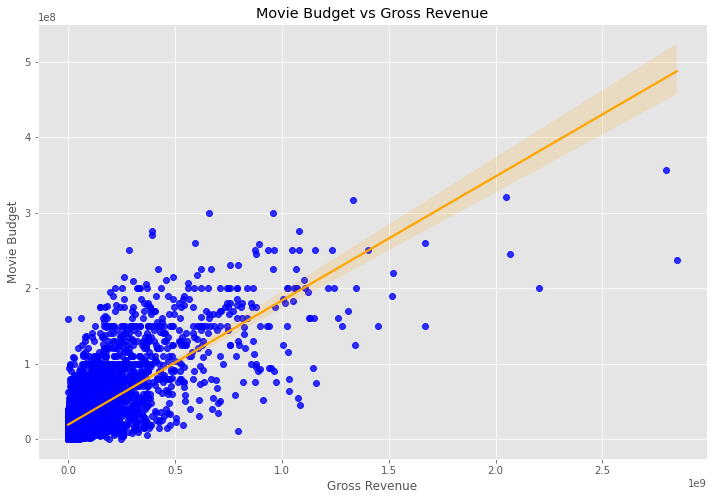

In [63]:
#Plotting Budget vs. Gross Revenue using seaborn

sns.regplot(x = 'gross', y = 'budget', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "orange"})
plt.ylabel('Movie Budget')  
plt.xlabel('Gross Revenue')  
plt.title('Movie Budget vs Gross Revenue') 
plt.show()

## Observation
After comparing the two variables to each other it appears that an increase in movie budget gives a higher gross revenue. In the same way, having a higher gross revenue seems to indicate that the film had a higher budget. Thus, the increase in one variable is associated with a proportional increase in the other variable.

## Correlation
We use the Pearson correlation method due to the number of movies in the dataset. Although from the histogram below, we can see that the budget and gross revenue data are not normally distributed and are right-skewed. Additionally, both variables seem to have a symmetric relationship and the Pearson correlation assumes that the relationship is symmetric, so we will utlize this correlation method.



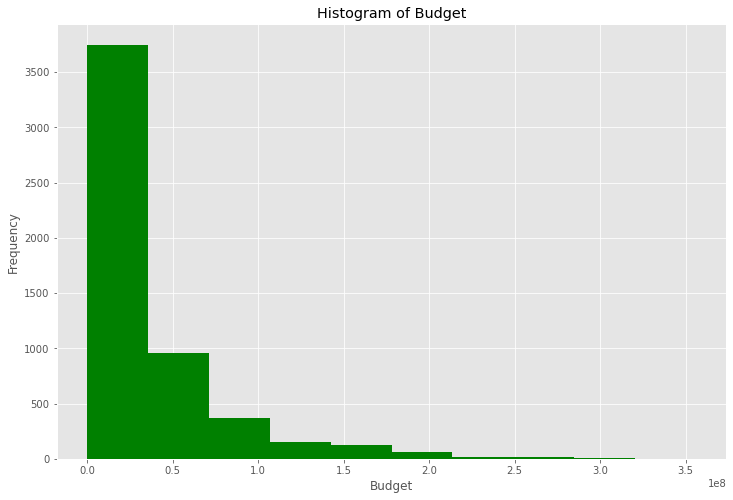

In [64]:
# Plot a histogram
plt.hist(df['budget'], bins=10, color = 'green')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Histogram of Budget')
plt.show()


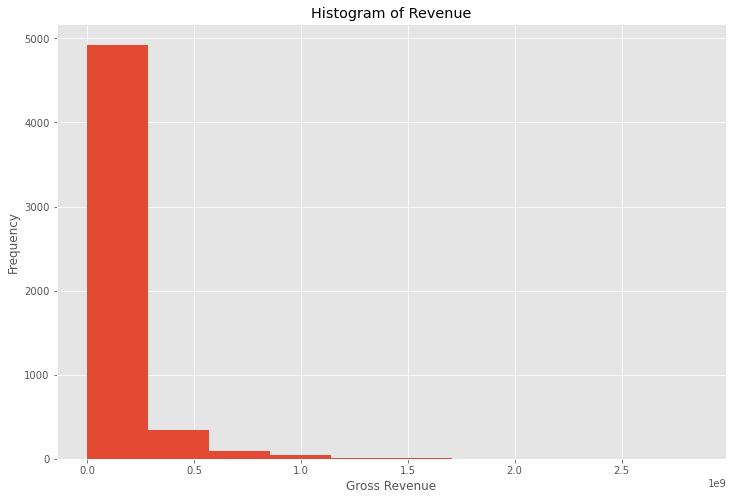

In [65]:
# Plot a histogram
plt.hist(df['gross'], bins=10)
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.show()


In [66]:
#Looking at correlation
df.corr(method = 'pearson')

,score,votes,budget,gross,runtime,real year
score,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
real year,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


## Observation

Unsurprisingly, there is a high correlation between the film budget and gross revenue!

Now, let's use a correlation matrix to better visualize the correlation data.


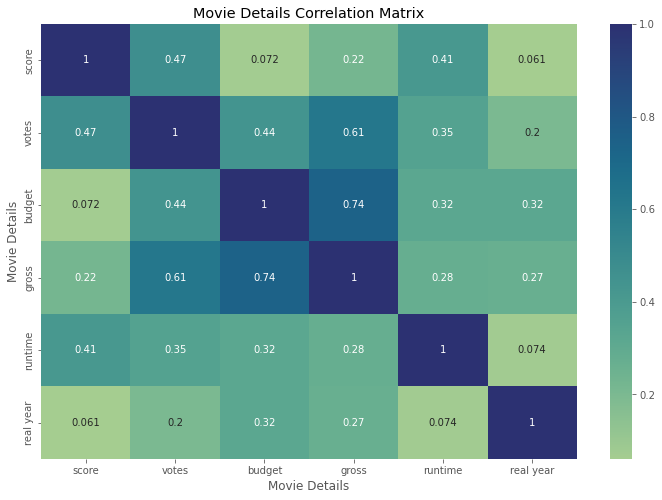

In [67]:
corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True, cmap="crest")

plt.ylabel("Movie Details")
plt.xlabel("Movie Details")
plt.title("Movie Details Correlation Matrix")

plt.show()

In [72]:
#unstacking to see the data in a more linear way
corr_matrix = df.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs

score      score        1.000000
           votes        0.473809
           budget       0.071792
           gross        0.222143
           runtime      0.414580
           real year    0.061029
votes      score        0.473809
           votes        1.000000
           budget       0.440021
           gross        0.614904
           runtime      0.352437
           real year    0.202883
budget     score        0.071792
           votes        0.440021
           budget       1.000000
           gross        0.740395
           runtime      0.318595
           real year    0.320245
gross      score        0.222143
           votes        0.614904
           budget       0.740395
           gross        1.000000
           runtime      0.275596
           real year    0.268626
runtime    score        0.414580
           votes        0.352437
           budget       0.318595
           gross        0.275596
           runtime      1.000000
           real year    0.074432
real year 

In [77]:
# Now let's extract the correlation values that have higher values 

high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross      votes        0.614904
votes      gross        0.614904
gross      budget       0.740395
budget     gross        0.740395
score      score        1.000000
gross      gross        1.000000
budget     budget       1.000000
votes      votes        1.000000
runtime    runtime      1.000000
real year  real year    1.000000
dtype: float64

## Observation

The next highest correlation is votes and gross revenue. It makes sense that a movie with higher revenue indicates more votes for that specific film and vice versa. Essentially, if a movie has high popularity (a higher number of votes), then people will be more inclined to pay to watch it. 

Now let's look at other parts of the dataset to see how they relate.

## What country produces movies with the highest revenue?

To answer this question, we can sum up the revenue for each country and then see which countries are at the top. The dataset appears to have mostly English titles, so it is likely that the U.S. will be at the top. Let's see what the data says.

In [92]:
# This creates separate groups of rows based on the names in the'country' column.
# Then, selects the 'gross' column from each group and calculates the sum of the values in that column. 
# So, we get the total gross revenue for each country.
# Lastly, it resets the index of the resulting DataFrame. 
# This ensures that the 'country' column becomes a regular column instead of being used as the index.
country_revenue = df.groupby('country')['gross'].sum().reset_index()


In [93]:
country_revenue

,country,gross
0,Argentina,78136242
1,Aruba,10319915
2,Australia,2800304264
3,Austria,83562985
4,Belgium,22932536
5,Brazil,40575200
6,Canada,5734558085
7,Chile,27972023
8,China,6305918953
9,Colombia,12594630


In [94]:
# Sorting the country_revenue DataFrame by 'gross' in descending order
country_revenue = country_revenue.sort_values(by='gross', ascending=False)


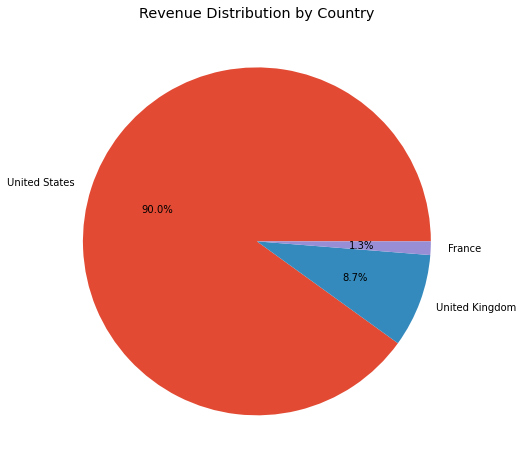

In [95]:
# Extracting the top 3 countries by revenue
top_countries = country_revenue.head(3)

# Creating a pie chart to display for the top 3 countries with the highest revenue. 
plt.figure(figsize=(8, 8))
plt.pie(top_countries['gross'], labels=top_countries['country'], autopct='%1.1f%%')
plt.title('Revenue Distribution by Country')
plt.show()

## Observation

The U.S. takes up most of the generated revenue in the film industry while the U.K. and France are next in line. Given the fact that the U.S. has a large cinema industry (Hollywood and New York City) and is a large country, it makes sense that they make the highest amount of revenue.

## Does the screen writer have a significant impact on revenue?

We can once again divide the data based on the screen writer to determine the total revenue generated by each. This can help us understand the significance of their contributions.

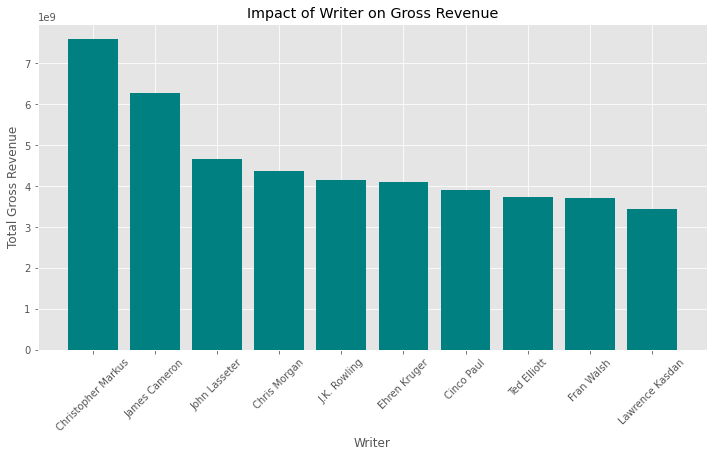

In [23]:
# Group the data by writer and calculate total gross revenue
writer_revenue = df.groupby('writer')['gross'].sum().reset_index()

# Sort the writers based on total gross revenue in descending order
writer_revenue = writer_revenue.sort_values(by='gross', ascending=False)

# Select the top 10 writers for better visualization
top_writers = writer_revenue.head(10)  # Adjust the number as per your preference

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_writers['writer'], top_writers['gross'], color = 'teal')
plt.xlabel('Writer')
plt.ylabel('Total Gross Revenue')
plt.title('Impact of Writer on Gross Revenue')
plt.xticks(rotation=45)
plt.show()

## Observation

We can see that films written by Christopher Markus and James Cameron tend to perform better financially. However, some limitations to these observations is that successful screenwriters may have the opportunity to work on high-budget films or projects with established directors, renowned actors, or popular franchises. 

Therefore, the financial success of these films could be driven by factors beyond the screenwriter's control, such as pre-existing fan bases or successful marketing strategies. It's essential to consider the context and circumstances surrounding each project to evaluate a screenwriter's impact on revenue more accurately.

## Does the rating of the film matter?

We can learn more about additional contributing factors by evaluting movie ratings (e.g., PG, PG-13, R) on financial success in the film industry.

Once again, we can group our data, this time by rating, and sum our gross revenue to assess the impact.

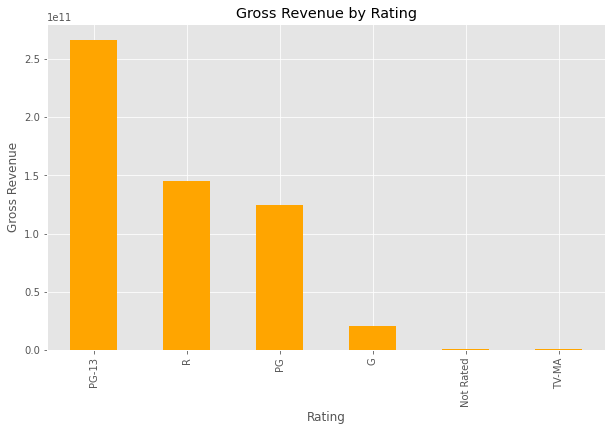

In [24]:
# Grouping by rating and calculate the sum of gross revenue
rating_revenue = df.groupby('rating')['gross'].sum()

# Sorting the rating revenue in descending order
rating_revenue = rating_revenue.sort_values(ascending=False)

top_rr = rating_revenue.head(6)

# Plot the data
plt.figure(figsize=(10, 6))
top_rr.plot(kind='bar', color = 'orange')
plt.xlabel('Rating')
plt.ylabel('Gross Revenue')
plt.title('Gross Revenue by Rating')
plt.show()


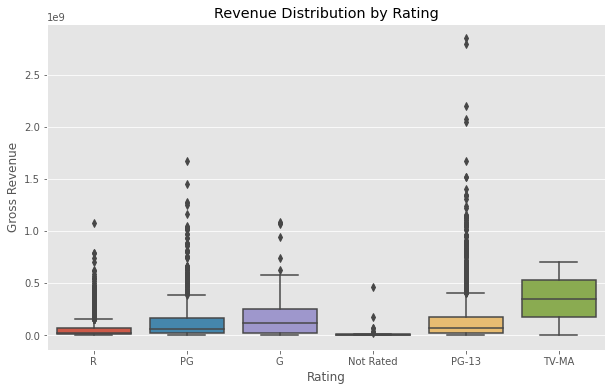

In [25]:
# Selecting the top 6 ratings
top_ratings = rating_revenue.head(6).index

# Filtering the DataFrame to include only the top ratings
df_top_ratings = df[df['rating'].isin(top_ratings)]

# Plot the box plot using the encoded DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='gross', data=df_top_ratings)
plt.xlabel('Rating')
plt.ylabel('Gross Revenue')
plt.title('Revenue Distribution by Rating')
plt.show()


## Observation

Although the first bar chart shows that the PG-13 rating has gained the most amount of revenue through the years, the  box and whisker plot shows that this can be attributed to outliers in the data for PG-13 films which are higher than any of the other ratings. In fact, we can see that films with the TV-MA rating generate greater revenue compared to the other ratings. So, the revenue for TV-MA rated movies are consistently higher compared to the rest. This is interesting because when the gross revenue is summed up (first bar chart), the TV-MA bar has the lowest value which highlights the importance of comparing the variables in different ways.

The second rating that has generated higher revenue filmd is G which also had a very short bar in the first plot. Additionally, we can see that the rating with films that generate less revennue is R, although it had the second highest bar in the first plot. One possible explanation is the amount of R rated films produced over time. Even though they may generally have lower revenue, the quantity of R rated films can account for the fact that the sum is very high. 

## What about genre?

Looking at the genre can provide additional information, so we can group our data to see what we get this time.


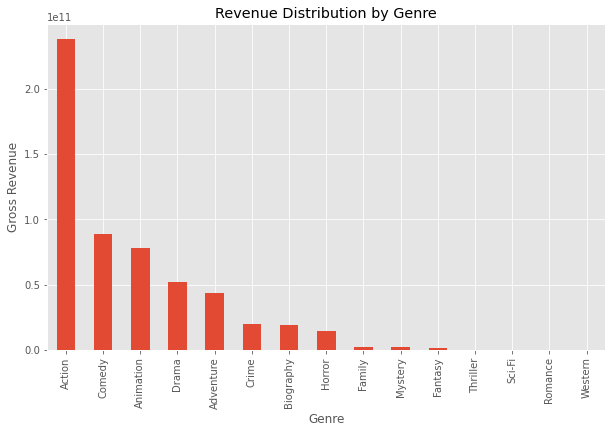

In [96]:
# Group by genre and calculate the total gross revenue
genre_revenue = df.groupby('genre')['gross'].sum()

# Sort the genres based on total gross revenue in descending order
genre_revenue = genre_revenue.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
genre_revenue.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.title('Revenue Distribution by Genre')
plt.show()


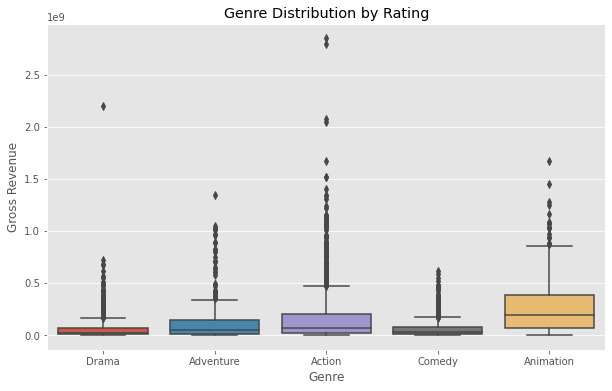

In [98]:
# Selecting the top 5 genres
top_genres = genre_revenue.head(5).index

# Filtering the DataFrame to include only the top ratings
df_top_genres = df[df['genre'].isin(top_genres)]

# Plot the box plot using the encoded DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='gross', data=df_top_genres)
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.title('Genre Distribution by Rating')
plt.show()

## Observation

Like the variables we compared in the previous part, we see that outliers play a heavy role in the total gross revenue. Although 'action' has generated the most revnue compared to the rest, this is due to several big outliers in the dataset. It is 'animation' which has films that generate higher revenue more than 50% of the time.

Actually, 'adventure' and 'action' seem to have very similar median revenues compared to the other genres. However, their bars in the first plot are drastically different since 'action' has the highest total revenue and 'adventure' has the lowest total revenue among the top 5 genres.

## How do rating and genre relate to each other?

To inspect these variables further, we can make a stacked bar chart by pivoting our data. This will allow us to see which ratings contribute to financial success in the movie industry. 

<Figure size 720x432 with 0 Axes>

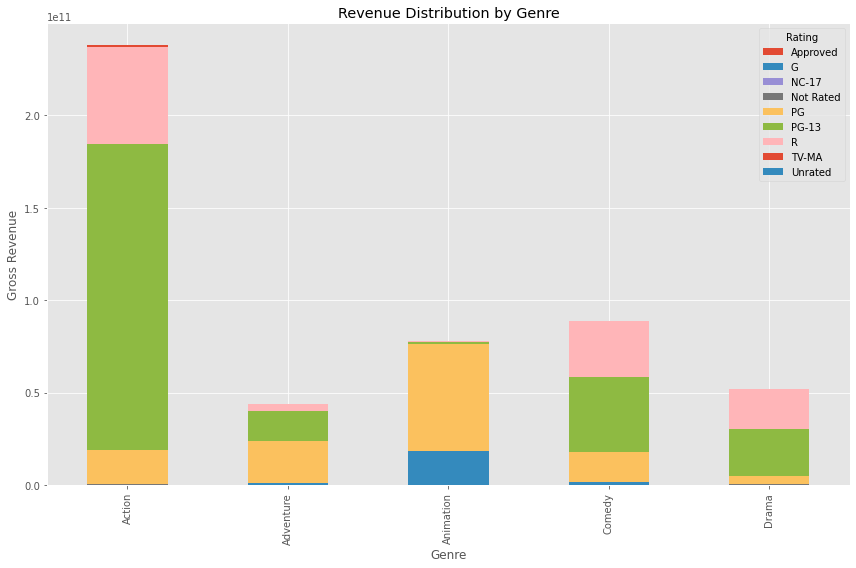

In [27]:
# Select the top genres
top_genres = genre_revenue.head(5).index

# Filter the DataFrame to include only the top genres
df_top_genres = df[df['genre'].isin(top_genres)]

# Pivot the data to create a genre-revenue matrix
genre_revenue_matrix = df_top_genres.pivot_table(index='genre', columns='rating', values='gross', aggfunc='sum', fill_value=0)

# Plot the stacked bar graph
plt.figure(figsize=(10, 6))
genre_revenue_matrix.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.title('Revenue Distribution by Genre')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


## Observation
We can see that PG-13, PG, and R rated films take up most of the total revenue. In other words, these types of ratings have a significant market share in terms of revenue, indicating their popularity and demand among audiences. This suggests that these rating categories have a strong presence and influence in the film industry.

From the stacked bar chart, we can see that genres with PG-13 and PG rated films are more likely to have higher revenue-generating films. 

The rating assigned to a film influences its content restrictions and audience accessibility. Since PG-13 and PG films typically have more lenient content restrictions compared to R rated films, then the PG-13 rating on films may broaden the appeal and accessibility to a wider audience. This could contribute to their higher revenue figures.

## Conclusion

Through this data exploration and analysis project, we have gained valuable insights into the factors influencing film revenue. In other words, it has shed light on the factors influencing financial success in the world of cinema. 

Grab your popcorn and let's recap our findings:

Our analysis reveals a positive correlation between movie budget and gross revenue. Films with higher budgets tend to generate greater financial returns, indicating the influence of investment in capturing audience attention. Moreover, the analysis demonstrates that the United States emerges as the primary revenue generator in the global film industry, underscoring the significance of Hollywood and the vast cinema industry within the country. We have also identified the influential role of screenwriters, with notable names like Christopher Markus and James Cameron consistently contributing to high-grossing films. The data show that films with PG-13, PG, and R ratings dominate the revenue landscape, reflecting their popularity and market demand. 

However, it is important to acknowledge the limitations of this data exploration. To start off, the dataset covers a specific time period from 1986 to 2016, and the film industry has most likely undergone significant changes since then. Factors such as the rise of streaming platforms and evolving audience preferences may have further influenced revenue patterns in recent years. Additionally, our analysis is based on a single dataset, and there may be other relevant variables and factors that could contribute to a film's financial success, such as marketing strategies, release timing (i.e., seasonal trends), and competition within the industry. Ultimately, despite these limitations, our analysis offers valuable insights and emphasizes the various factors that drives success in the film industry.